In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import os

In [12]:
from sqlalchemy import create_engine

connection_string = (
    "mssql+pyodbc://@localhost\\SQLEXPRESS/ecommerce?"
    "driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)

engine = create_engine(connection_string)

folder_path = r"C:\Users\advan\Downloads\Dataset Project 1"

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        print(f"Uploading {file_path}...")

        df = pd.read_csv(file_path)

        table_name = os.path.splitext(file)[0]

        df.to_sql(table_name, engine, if_exists="replace", index=False)

        print(f"✅ Uploaded {file} into table [{table_name}] in ecommerce database")

Uploading C:\Users\advan\Downloads\Dataset Project 1\customers.csv...


C:\Users\advan\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


✅ Uploaded customers.csv into table [customers] in ecommerce database
Uploading C:\Users\advan\Downloads\Dataset Project 1\geolocation.csv...
✅ Uploaded geolocation.csv into table [geolocation] in ecommerce database
Uploading C:\Users\advan\Downloads\Dataset Project 1\orders.csv...
✅ Uploaded orders.csv into table [orders] in ecommerce database
Uploading C:\Users\advan\Downloads\Dataset Project 1\order_items.csv...
✅ Uploaded order_items.csv into table [order_items] in ecommerce database
Uploading C:\Users\advan\Downloads\Dataset Project 1\payments.csv...
✅ Uploaded payments.csv into table [payments] in ecommerce database
Uploading C:\Users\advan\Downloads\Dataset Project 1\products.csv...
✅ Uploaded products.csv into table [products] in ecommerce database
Uploading C:\Users\advan\Downloads\Dataset Project 1\sellers.csv...
✅ Uploaded sellers.csv into table [sellers] in ecommerce database


In [16]:
from sqlalchemy import create_engine, text

engine = create_engine(connection_string)

with engine.connect() as conn:
    result = conn.execute(text("SELECT @@VERSION"))
    print(result.fetchone())


('Microsoft SQL Server 2025 (RTM) - 17.0.1000.7 (X64) \n\tOct 21 2025 12:05:57 \n\tCopyright (C) 2025 Microsoft Corporation\n\tExpress Edition (64-bit) on Windows 10 Home Single Language 10.0 <X64> (Build 26200: ) (Hypervisor)\n',)


C:\Users\advan\AppData\Local\Temp\ipykernel_2392\498166398.py:5: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect() as conn:


In [19]:
import pandas as pd
from sqlalchemy import create_engine, text

engine = create_engine(
    "mssql+pyodbc://localhost\\SQLEXPRESS/ecommerce?"
    "driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)

# Count rows in SQL Server
with engine.connect() as conn:
    result = conn.execute(text("SELECT COUNT(*) FROM products"))
    print("Rows in SQL Server:", result.scalar())

# Count rows in CSV
df = pd.read_csv(r"C:\Users\advan\Downloads\Dataset Project 1\products.csv")
print("Rows in CSV:", len(df))

Rows in SQL Server: 32951
Rows in CSV: 32951


C:\Users\advan\AppData\Local\Temp\ipykernel_2392\3673648281.py:10: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect() as conn:


## SQL Project Questions ##

# List all unique cities where customers are located #

In [20]:
with engine.connect() as conn:
    result = conn.execute(text("SELECT DISTINCT customer_city from customers"))
    rows = result.fetchall()
    for row in rows:
        print(row[0])

abadia dos dourados
abadiania
abaete
abaetetuba
abaiara
abaira
abare
abatia
abdon batista
abelardo luz
abrantes
abre campo
abreu e lima
acaiaca
acailandia
acajutiba
acarau
acari
acegua
acopiara
acreuna
acu
acucena
adamantina
adhemar de barros
adolfo
adrianopolis
adustina
afogados da ingazeira
afonso claudio
afranio
agisse
agrestina
agrolandia
agronomica
agua boa
agua branca
agua clara
agua comprida
agua doce
agua doce do norte
agua fria de goias
agua limpa
agua nova
agua preta
agua santa
aguai
aguas belas
aguas claras
aguas da prata
aguas de lindoia
aguas de santa barbara
aguas de sao pedro
aguas formosas
aguas frias
aguas lindas de goias
aguas mornas
aguas vermelhas
agudo
agudos
aguia branca
aimores
aiuaba
aiuruoca
ajapi
ajuricaba
alagoa
alagoa grande
alagoa nova
alagoinha
alagoinhas
alambari
alcantara
alcinopolis
alcobaca
alegre
alegrete
alegrete do piaui
alegria
alem paraiba
alexandra
alexandria
alexandrita
alexania
alfenas
alfredo chaves
alfredo marcondes
alfredo vasconcelos
alfred

# Count the number of orders placed in 2017 #

In [21]:

with engine.connect() as conn:
    result = conn.execute(text("select count(order_id) from orders where year(order_purchase_timestamp) = 2017"))
    rows = result.fetchall()
    print('Total orders in 2017 are', rows[0][0])

Total orders in 2017 are 45101


# Find the total Sales per Category #

In [45]:
with engine.connect() as conn:
    result = conn.execute(text("""Select upper(po.[product category]),round(sum(p.payment_value),2) as Sales from payments p join order_items o on p.order_id = o.order_id join products po on po.product_id = o.product_id
group by po.[product category]"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ['Category','Sales'])
df

,Category,Sales
0,HOUSE COMFORT,84329.06
1,FIXED TELEPHONY,207010.26
2,COOL STUFF,779698.00
3,ELECTRICES 2,124563.46
4,CONSTRUCTION TOOLS CONSTRUCTION,241475.63
...,...,...
69,FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN,74660.98
70,CONSTRUCTION SECURITY TOOLS,65691.03
71,INSURANCE AND SERVICES,324.51
72,FURNITURE OFFICE,646826.49


# Calculate the percentage of orders that were paid in installments. #

In [22]:
with engine.connect() as conn:
    result = conn.execute(text("""select (sum(case when payment_installments >= 1 then 1 else 0 end))*100.00/count(*) from payments"""))
    rows = result.fetchall()
print("Percentage of orders paid installments were :",round(rows[0][0],4))

Percentage of orders paid installments were : 99.9981


# Count the number of customers from each state #

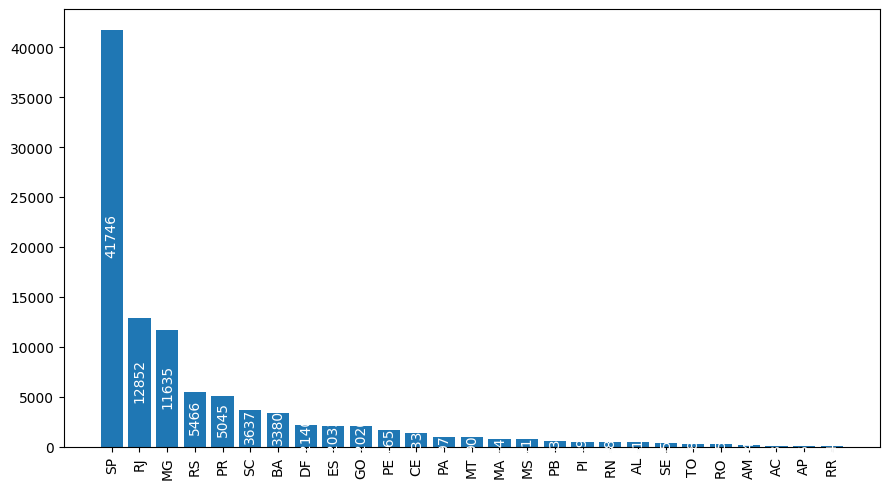

In [36]:
with engine.connect() as conn:
    result = conn.execute(text("""select customer_state, count(customer_id) from customers group by customer_state"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ['State','Customer_count'])
df = df.sort_values(by = "Customer_count",ascending=False)

plt.figure(figsize = (9,5))
bars = plt.bar(df["State"], df["Customer_count"])
plt.bar_label(bars,rotation = 90, padding = 2,label_type = 'center', color = 'white')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate the number of orders per month in 2018

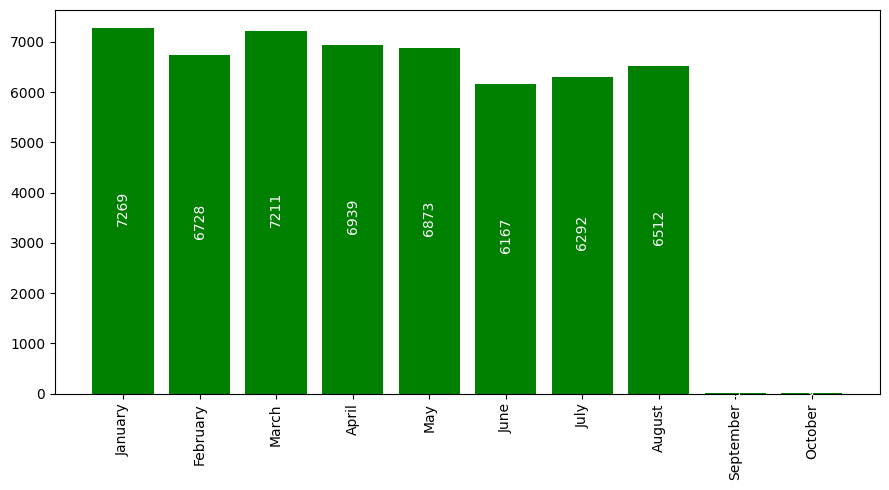

In [50]:
with engine.connect() as conn:
    result = conn.execute(text("""select datename(MONTH,order_purchase_timestamp) as Month,count(order_id) as Count from orders
where year(order_purchase_timestamp) = 2018
group by datename(MONTH,order_purchase_timestamp),MONTH(order_purchase_timestamp)
order by Month(order_purchase_timestamp)"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ['Month','Order_Count'])
plt.figure(figsize = (9,5))

bars = plt.bar(df["Month"], df["Order_Count"],color = 'green')
plt.bar_label(bars,rotation = 90, padding = 2,label_type = 'center', color = 'white')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Find the average number of products per order, grouped by customer city.

In [63]:
with engine.connect() as conn:
    result = conn.execute(text("""with count_per_order as
(select o.order_id,o.customer_id,count(ot.order_id) oc from order_items ot join orders o on
ot.order_id = o.order_id
group by o.order_id,o.customer_id
)
select c.customer_city, AVG(cpo.oc) as average_orders from count_per_order cpo join customers c on
cpo.customer_id = c.customer_id
group by c.customer_city order by average_orders desc"""))
    rows = result.fetchall()
df = pd.DataFrame(rows,columns = ["Customer_city","Average_orders/Order"])
df.head(10)

,Customer_city,Average_orders/Order
0,padre carvalho,7
1,candido godoi,6
2,celso ramos,6
3,datas,6
4,matias olimpio,5
5,morro de sao paulo,4
6,curralinho,4
7,cidelandia,4
8,picarra,4
9,teixeira soares,4


# Calculate the percentage of total revenue contributed by each product category.

In [65]:
with engine.connect() as conn:
    result = conn.execute(text("""Select upper(po.[product category]),round((sum(p.payment_value)/(select sum(payment_value) from payments))*100,2) as Sales from payments p join order_items o on p.order_id = o.order_id join products po on po.product_id = o.product_id
group by po.[product category]
order by Sales desc"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ["Category","Percentage_revenue"])
df.head(10)

,Category,Percentage_revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [70]:
import numpy as np
with engine.connect() as conn:
    result = conn.execute(text("""select upper(products.[product category]) product_category, 
count(order_items.product_id) count,
round(avg(order_items.price),2) price
from products join order_items on
products.product_id = order_items.product_id
group by products.[product category]"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ["Category","Order_Count","Price"])
df.head(10)

,Category,Order_Count,Price
0,FIXED TELEPHONY,264,225.69
1,HOUSE COMFORT,434,134.96
2,COOL STUFF,3796,167.36
3,ELECTRICES 2,238,476.12
4,CONSTRUCTION TOOLS CONSTRUCTION,929,155.73
5,FASHION CHILDREN'S CLOTHING,8,71.23
6,CASA CONSTRUCAO,604,137.56
7,FASHION UNDERWEAR AND BEACH FASHION,131,72.84
8,FASHION CALCADOS,262,89.93
9,CONSTRUCTION TOOLS ILLUMINATION,304,135.13


In [75]:
arr1 = df["Order_Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])
print("The correlation between product price and product count is : ", a[0][-1])

The correlation between product price and product count is :  -0.10631514167157567


# Calculate the total revenue generated by each seller, and rank them by revenue

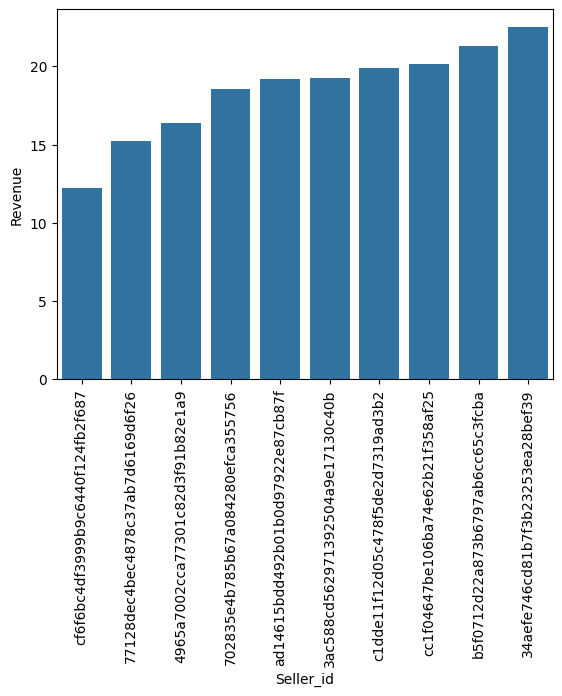

In [87]:


with engine.connect() as conn:
    result = conn.execute(text("""select *,dense_rank() over(order by revenue) from (select order_items.seller_id, sum(payments.payment_value) revenue from order_items join payments on 
order_items.order_id = payments.order_id
group by order_items.seller_id) a"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ["Seller_id","Revenue","Rank"])
df = df.head(10)
sns.barplot(x = "Seller_id",y = "Revenue", data = df)
plt.xticks(rotation = 90)
plt.show()
            

# Calculate the moving average of order values for each customer over their order history.

In [91]:

with engine.connect() as conn:
    result = conn.execute(text("""select customer_id,order_purchase_timestamp,avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from payments join orders on
payments.order_id = orders.order_id) as a"""))
    rows = result.fetchall()
df = pd.DataFrame(rows)
df.head(10)

            


,customer_id,order_purchase_timestamp,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71


# Calculate the cumulative sales per month for each year.

In [102]:

with engine.connect() as conn:
    result = conn.execute(text("""select Years,Months,Sales,sum(Sales) over(order by Years,Months) Cumulative_sales from 
(select YEAR(orders.order_purchase_timestamp) as Years,
datename(MONTH,orders.order_purchase_timestamp) as Months,
round(sum(payments.payment_value),2) as Sales
from orders join payments on
orders.order_id = payments.order_id
group by  YEAR(orders.order_purchase_timestamp),
    MONTH(orders.order_purchase_timestamp),
    DATENAME(MONTH, orders.order_purchase_timestamp))a"""))
    rows = result.fetchall()
df = pd.DataFrame(rows)
df

,Years,Months,Sales,Cumulative_sales
0,2016,December,19.62,19.62
1,2016,October,59090.48,59110.10
2,2016,September,252.24,59362.34
3,2017,April,417788.03,477150.37
4,2017,August,674396.32,1151546.69
5,2017,December,878401.48,2029948.17
6,2017,February,291908.01,2321856.18
7,2017,January,138488.04,2460344.22
8,2017,July,592382.92,3052727.14
9,2017,June,511276.38,3564003.52


# Calculate the year-over-year growth rate of total sales

In [112]:
with engine.connect() as conn:
    result = conn.execute(text("""with a as (select YEAR(orders.order_purchase_timestamp) as Years,
round(sum(payments.payment_value),2) as Sales
from orders join payments on
orders.order_id = payments.order_id
group by  YEAR(orders.order_purchase_timestamp))
select Years,((Sales - lag(Sales,1) over(order by Years)) / lag(Sales,1) over(order by Years)) * 100 as yoy_growth from a
"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ["Years","yoy_growth%"])
df

,Years,yoy_growth%
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

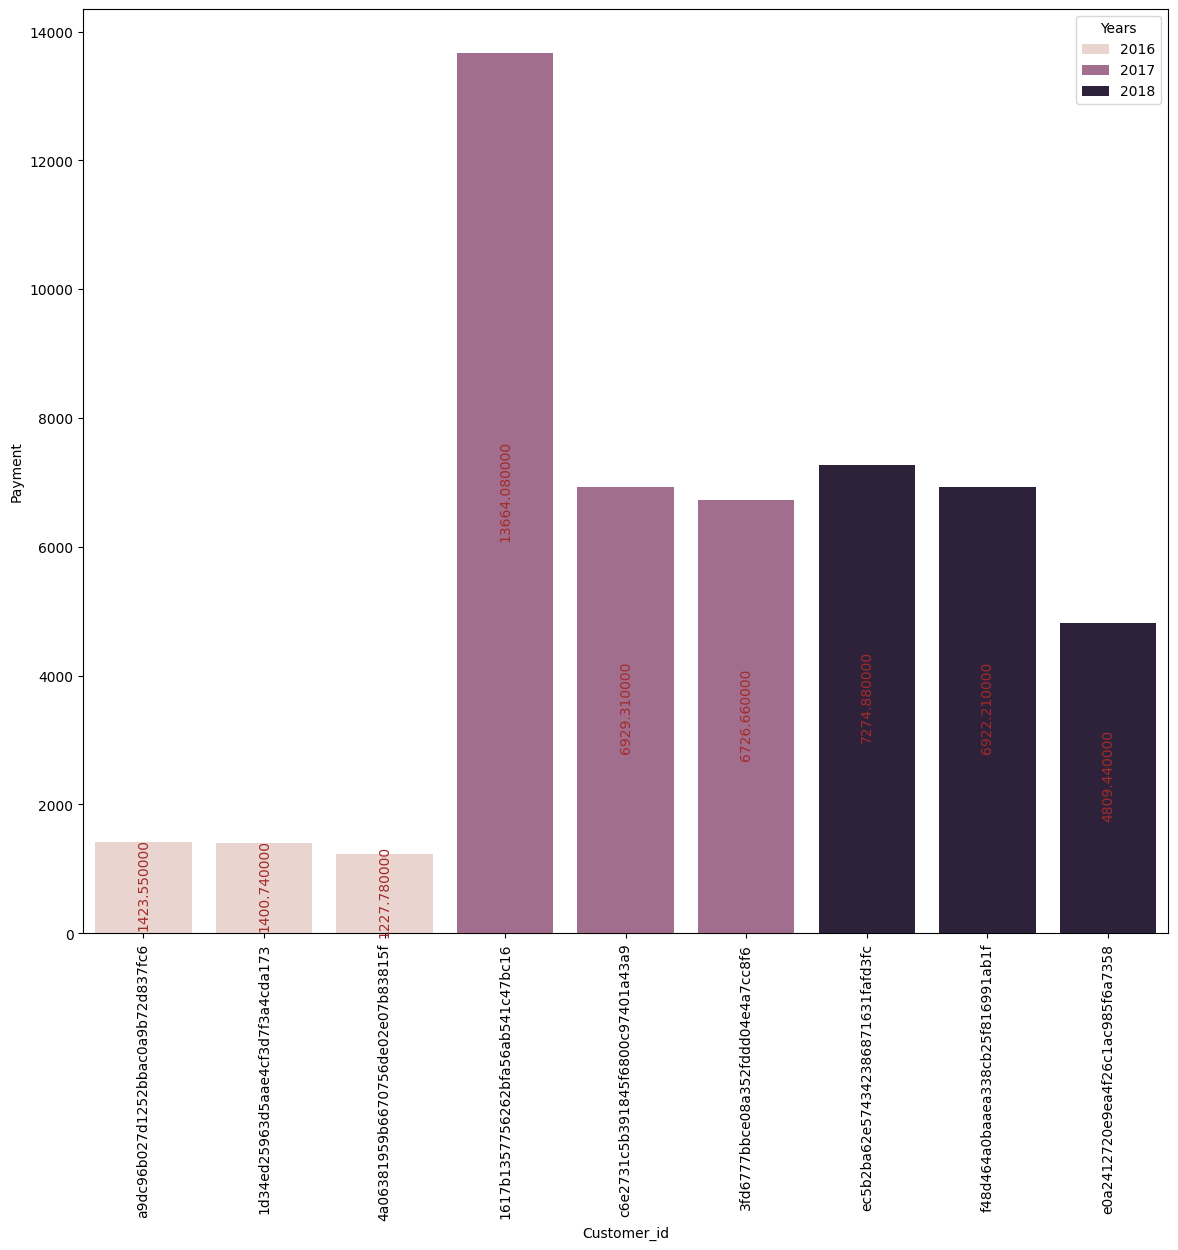

In [130]:



with engine.connect() as conn:
    result = conn.execute(text("""select Year, customer_id,sales,rnk from (
select year(order_purchase_timestamp) Year,c.customer_id,sum(p.payment_value) sales,
dense_rank() over(partition by year(order_purchase_timestamp) order by sum(p.payment_value) desc) rnk from customers c join orders o on
o.customer_id = c.customer_id join payments p on
p.order_id = o.order_id
group by year(order_purchase_timestamp),c.customer_id)a
where rnk <= 3"""))
    rows = result.fetchall()
df = pd.DataFrame(rows, columns = ["Years","Customer_id","Payment", "Rank"])
plt.figure(figsize = (14,12))
ax = sns.barplot(x = "Customer_id", y = "Payment",data = df, hue = "Years")
for container in ax.containers:
    ax.bar_label(container, fmt ="%2f",rotation = 90, padding = 2,label_type = "center", color = "brown")
plt.xticks(rotation = 90)
plt.show()